<a href="https://colab.research.google.com/github/Srinithi-06/FUTURE_DS_03/blob/main/FUTURE_DS_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

df = pd.read_csv('/content/student_feedback (1).csv')
df.head()


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [7]:
print("Shape of data:", df.shape)
print("Column Names:", df.columns.tolist())
df.head()


Shape of data: (1001, 10)
Column Names: ['Unnamed: 0', 'Student ID', 'Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations', 'Degree of difficulty of assignments', 'Solves doubts willingly', 'Structuring of the course', 'Provides support for students going above and beyond', 'Course recommendation based on relevance']


,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [9]:
df.drop_duplicates(inplace=True)
df.dropna(how='all', inplace=True)
print("New shape:", df.shape)


New shape: (1001, 10)


In [11]:
# Remove unwanted spaces in column names
df.columns = df.columns.str.strip()



In [13]:
!pip install textblob


In [17]:
from textblob import TextBlob


In [21]:
# Print all column names
print(df.columns.tolist())


['Unnamed: 0', 'Student ID', 'Well versed with the subject', 'Explains concepts in an understandable way', 'Use of presentations', 'Degree of difficulty of assignments', 'Solves doubts willingly', 'Structuring of the course', 'Provides support for students going above and beyond', 'Course recommendation based on relevance']


In [25]:
for i, col in enumerate(df.columns):
    print(f"{i}: '{col}'")


0: 'Unnamed: 0'
1: 'Student ID'
2: 'Well versed with the subject'
3: 'Explains concepts in an understandable way'
4: 'Use of presentations'
5: 'Degree of difficulty of assignments'
6: 'Solves doubts willingly'
7: 'Structuring of the course'
8: 'Provides support for students going above and beyond'
9: 'Course recommendation based on relevance'


In [27]:
df.columns = df.columns.str.strip()


In [29]:
# Convert all columns (except ID column) to numeric
for col in df.columns[1:]:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [31]:
avg_ratings = df.mean(numeric_only=True)
avg_ratings


,0
Unnamed: 0,500.000000
Student ID,500.000000
Well versed with the subject,7.497502
Explains concepts in an understandable way,6.081918
Use of presentations,5.942058
Degree of difficulty of assignments,5.430569
Solves doubts willingly,5.474525
Structuring of the course,5.636364
Provides support for students going above and beyond,5.662338
Course recommendation based on relevance,5.598402


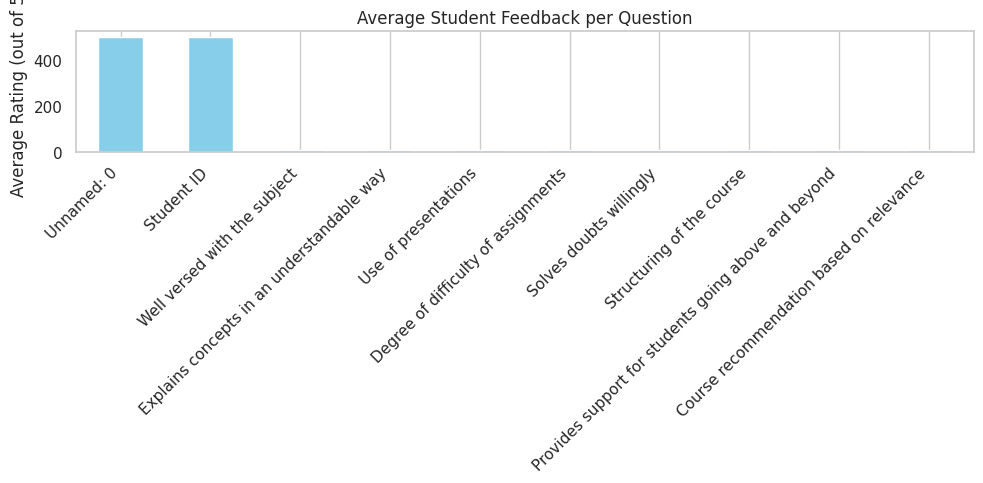

In [40]:
import matplotlib.pyplot as plt

avg_ratings.plot(kind='bar', figsize=(10,5), color='skyblue')
plt.title("Average Student Feedback per Question")
plt.ylabel("Average Rating (out of 5)")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


/tmp/ipython-input-42-2303051331.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barh_plot = sns.barplot(
/tmp/ipython-input-42-2303051331.py:18: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


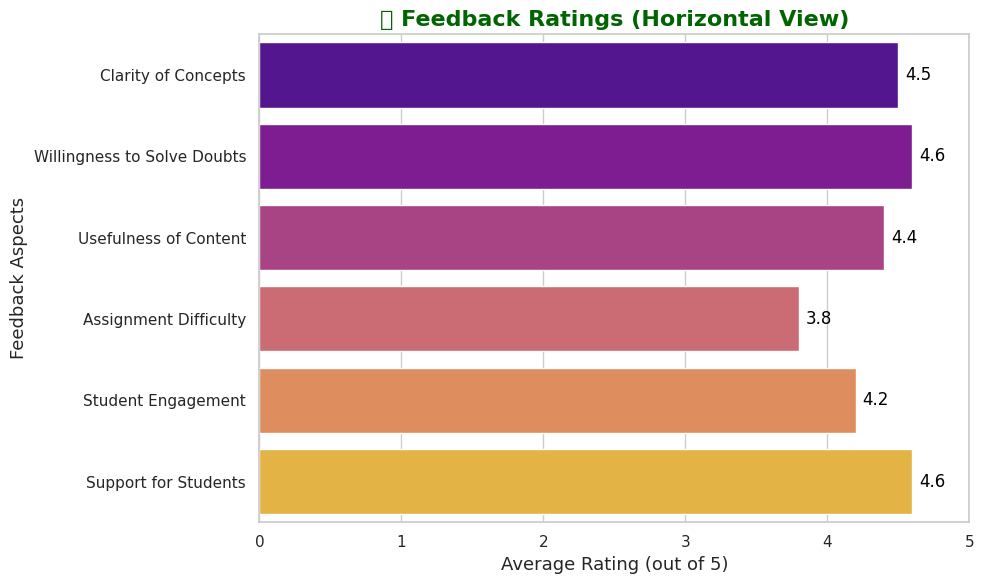

In [42]:
# Horizontal bar chart
plt.figure(figsize=(10, 6))
barh_plot = sns.barplot(
    y='Feedback Question',
    x='Average Rating',
    data=df,
    palette='plasma'
)

# Add value labels beside bars
for index, row in df.iterrows():
    barh_plot.text(row['Average Rating'] + 0.05, index, round(row['Average Rating'], 1), color='black', va="center", fontsize=12)

plt.title('💡 Feedback Ratings (Horizontal View)', fontsize=16, weight='bold', color='darkgreen')
plt.xlabel('Average Rating (out of 5)', fontsize=13)
plt.ylabel('Feedback Aspects', fontsize=13)
plt.xlim(0, 5)
plt.tight_layout()
plt.show()



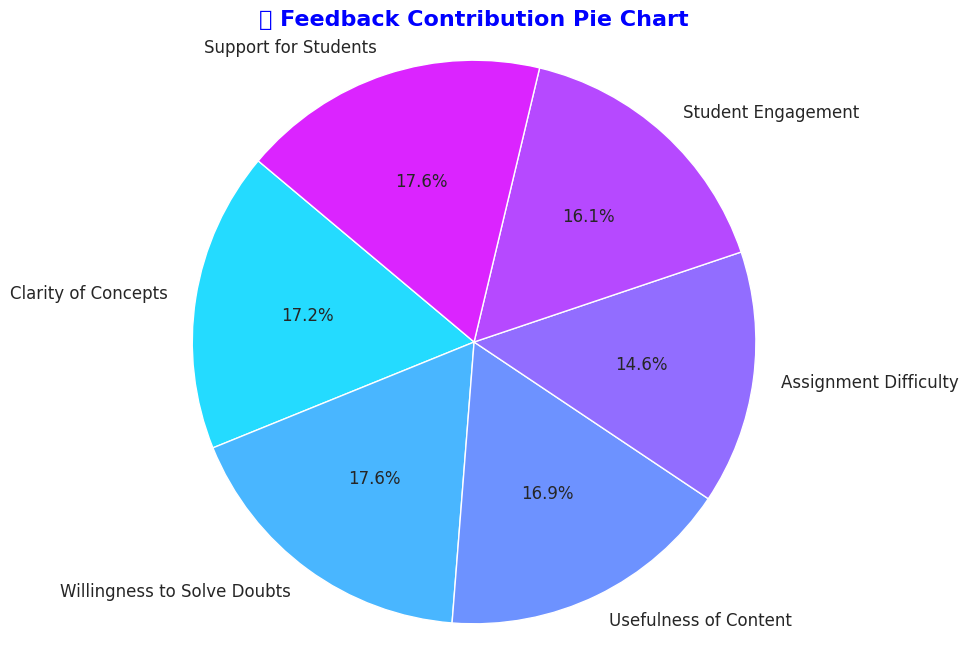

In [47]:
# Pie chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette('cool')

plt.pie(df['Average Rating'], labels=df['Feedback Question'], colors=colors,
        autopct='%1.1f%%', startangle=140, textprops={'fontsize': 12})

plt.title("🍰 Feedback Contribution Pie Chart", fontsize=16, color='blue', weight='bold')
plt.axis('equal')  # Equal aspect ratio ensures a perfect circle
plt.show()
